# Step 3 - K-Means analysis

### DATABASE MARKETING - TIẾP THỊ DỰA TRÊN CỞ SỞ DỮ LIỆU VÀ THUẬT TOÁN
1. Điều cốt lõi của quan hệ khách hàng (CRM) là tiếp thị cơ sở dữ liệu
    - Phải xây dựng được: Data Mining Techniques in CRM Inside Customer Segmentation - phải xây dựng được cơ sở dữ liệu riêng biệt về khách hàng, nhân viên, các sản phẩm, dịch vụ, những nhà phân phối, bán buôn và nhà bán lẻ
    - Các cơ sở dữ liệu giúp: cho nhân viên tiếp thị dễ dàng hơn khi tiến hành chào hàng thích hợp với từng cá nhân khách hàng
2. Để xây dựng cơ sở dữ liệu khách hàng thì chúng ta cần
    - Thông tin quan trọng nhất cần ghi nhận là lịch sử mua hàng của từng khách hàng. Biết trước đây khách hàng đã từng mua gì cho ta manh mối để xem họ có thể sẽ thích mua gì cho lần tiếp theo
    - Sẽ hữu ích nếu bạn có được thông tin dân số học về mỗi người mua. 
        + Đối với người tiêu dùng, đó là tuổi tác, học vấn, thu nhập, số người trong gia đình và những thuộc tính khác cần thiết
        + Đối với doanh nhân: đó là chức vụ công việc, nhiệm vụ công tác, quan hệ nghề nghiệp và địa chỉ liên lạc
    - Có thêm thông tin về tâm lý mô tả những hoạt động, mối quan tâm và quan điểm (activities, interests, options - AIO) của cá nhân khách hàng và họ suy nghĩ, quyết định và ảnh hưởng tới người khác ra sao
3. Thử thất thứ 2 làm sao lấy được thông tin người dùng đó là 1 nghệ thuật
    - Huấn luyện cho nhân viên bán hàng cách lấy và thu thập thông tin có ích này vào hồ sơ khách hàng sau mỗi lần gặp gỡ
    - Nhân viên tiếp thị từ xa có thể bổ sung thêm thông tin bằng cách gọi điện thoại cho khách hàng hoặc hỏi các câu hỏi cần thiết hơn
4. Thử thách thứ 3 là duy trì và cách cập nhật thông tin
    - Hàng năm khoảng 20% thông tin trong cơ sở dữ liệu khách hàng trở nên lỗi thời => Bạn cần nhân viên tiếp thị gọi điện thoại mỗi ngày để cập nhật những thông tin này
5. Thử thách thứ 4 là sử dụng thông tin sao có ích nhất
    - Phải có kỹ năng khai thác dữ liệu
    - Phải thiết lập 1 kho dữ liệu phong phú có thể tốn hàng triệu đô la cho công nghệ và phối hợp thực hiện và thay đổi quy trình
6. Rõ ràng tiếp thị từng cá nhân không có nghĩa là áp dụng cho tất cả mọi người
#### ĐIỀU KHÁCH HÀNG MUỐN
- Chúng tôi không muốn công ty có quá nhiều thông tin cá nhân của chúng tôi
- Chúng tôi sẵn sàng nói với một số công ty những gì chúng tôi thích được thông tin
- Chúng tôi muốn công ty chỉ đến với chúng tôi bằng những thông điệp và phương tiện thích hợp những thời điểm thích hợp
- Chúng tôi muốn có thể tiếp cận công ty dễ dàng bằng điện thoại và email và được phản hồi nhanh chóng
#### ĐIỀU CÔNG TY MUỐN
- Chúng tôi muốn biết nhiều điều về mỗi khách hàng và khách hàng tiềm năng
- Chúng tôi muốn lôi cuốn khách hàng bằng việc chào hàng kể cả món hàng họ chưa hề biết hay lúc đầu chưa quan tâm
- Chúng tôi muốn tiếp cận khách hàng bằng bất kỳ phương tiện truyền thông nào miễn là tiết kiệm những hiệu quả, không cần biết họ có thích hay không !!!!
- Chúng tôi muốn giảm chi phí nói chuyện trực tiếp với khách hàng qua điện thoại

## A. Import lib

In [1]:
# Import libraries
import pandas as pd
import datetime as dt
import numpy as np
import re

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import collections
from collections import Counter
from collections import defaultdict
import itertools

from scipy import stats
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
plt.style.use('seaborn')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## B. Upload data

In [2]:
# 2. Upload data => name file: House_data.xlsx
dir_file = "data_analysis/online_retail_data_analysis.csv"
df = pd.read_csv(dir_file, encoding='latin1')

In [3]:
df.head()

,Unnamed: 0,fea_invoice_date,fea_year,fea_month,fea_day,fea_weekofyear,fea_daily,fea_customer_id,fea_country,fea_invoice_no,fea_type_invoice,fea_stock_code,fea_type_stock_code,fea_description_1,fea_description_2,fea_description_3,fea_quantity,fea_unit_price,fea_revenue
0,0,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,sales,85123A,a,WHITE HANGING HEART T-LIGHT HOLDER,white hanging heart tlight holder,white hanging heart tlight holder,6.0,2.55,15.30
1,1,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,sales,71053,other,WHITE METAL LANTERN,white metal lantern,white metal lantern,6.0,3.39,20.34
2,2,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,sales,84406B,b,CREAM CUPID HEARTS COAT HANGER,cream cupid hearts coat hanger,cream cupid hearts coat hanger,8.0,2.75,22.00
3,3,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,sales,84029G,g,KNITTED UNION FLAG HOT WATER BOTTLE,knitted union flag hot water bottle,knitted union flag hot water bottle,6.0,3.39,20.34
4,4,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,sales,84029E,e,RED WOOLLY HOTTIE WHITE HEART.,red woolly hottie white heart,red woolly hottie white heart,6.0,3.39,20.34


In [4]:
df.tail()

,Unnamed: 0,fea_invoice_date,fea_year,fea_month,fea_day,fea_weekofyear,fea_daily,fea_customer_id,fea_country,fea_invoice_no,fea_type_invoice,fea_stock_code,fea_type_stock_code,fea_description_1,fea_description_2,fea_description_3,fea_quantity,fea_unit_price,fea_revenue
536636,541904,2011-09-12 12:50:00,2011,9,12,37,0,12680.0,France,581587,sales,22613,other,PACK OF 20 SPACEBOY NAPKINS,pack of 2 spaceboy napkins,pack of spaceboy napkins,12.0,0.85,10.20
536637,541905,2011-09-12 12:50:00,2011,9,12,37,0,12680.0,France,581587,sales,22899,other,CHILDREN'S APRON DOLLY GIRL,childrens apron dolly girl,childrens apron dolly girl,6.0,2.10,12.60
536638,541906,2011-09-12 12:50:00,2011,9,12,37,0,12680.0,France,581587,sales,23254,other,CHILDRENS CUTLERY DOLLY GIRL,childrens cutlery dolly girl,childrens cutlery dolly girl,4.0,4.15,16.60
536639,541907,2011-09-12 12:50:00,2011,9,12,37,0,12680.0,France,581587,sales,23255,other,CHILDRENS CUTLERY CIRCUS PARADE,childrens cutlery circus parade,childrens cutlery circus parade,4.0,4.15,16.60
536640,541908,2011-09-12 12:50:00,2011,9,12,37,0,12680.0,France,581587,sales,22138,other,BAKING SET 9 PIECE RETROSPOT,baking setpiece retrospot,baking set piece retrospot,3.0,4.95,14.85


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536641 entries, 0 to 536640
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           536641 non-null  int64  
 1   fea_invoice_date     536641 non-null  object 
 2   fea_year             536641 non-null  int64  
 3   fea_month            536641 non-null  int64  
 4   fea_day              536641 non-null  int64  
 5   fea_weekofyear       536641 non-null  int64  
 6   fea_daily            536641 non-null  int64  
 7   fea_customer_id      536641 non-null  object 
 8   fea_country          536641 non-null  object 
 9   fea_invoice_no       536641 non-null  object 
 10  fea_type_invoice     536641 non-null  object 
 11  fea_stock_code       536641 non-null  object 
 12  fea_type_stock_code  536641 non-null  object 
 13  fea_description_1    536641 non-null  object 
 14  fea_description_2    536641 non-null  object 
 15  fea_description_3

In [6]:
# Chuyển fea_invoice_date qua kiểu dữ liệu date
# convert object to datetime
df['fea_invoice_date'] = pd.to_datetime(df['fea_invoice_date'])

## C. DATA ANALYSIS

### 1.1. Data Pre-Processing and Feature Engineering

In [7]:
df.columns

Index(['Unnamed: 0', 'fea_invoice_date', 'fea_year', 'fea_month', 'fea_day',
       'fea_weekofyear', 'fea_daily', 'fea_customer_id', 'fea_country',
       'fea_invoice_no', 'fea_type_invoice', 'fea_stock_code',
       'fea_type_stock_code', 'fea_description_1', 'fea_description_2',
       'fea_description_3', 'fea_quantity', 'fea_unit_price', 'fea_revenue'],
      dtype='object')

### 1.1.1. fea_invoice_date
- Tách ra 2 phần date và time

In [8]:
# Split datetime from InvoiceDate
df['fea_date'] = df['fea_invoice_date'].dt.date
df['fea_time'] = df['fea_invoice_date'].dt.time

### 1.1.2. fea_invoice_no
- Chuyển đổi kiểu dữ liệu sang categorical
- Đối với những hóa đơn có dữ liệu C đầu có nghĩa là cancel hóa đơn, ngược lại là bán hàng

In [9]:
# Encode CancelledOrder
df['fea_type_invoice'] = df['fea_type_invoice'].astype('category')
df['fea_type_invoice'].unique()

[sales, Returns]
Categories (2, object): [sales, Returns]

In [10]:
# Lọc dữ liệu
def filter_row(df, column, criterion, operator='equal'):
    '''
    Filter rows based on specific condition
    '''
    if operator == 'equal':
        return df[df[column] == criterion]
    if operator == 'less':
        return df[df[column] <= criterion]
    if operator == 'more':
        return df[df[column] >= criterion]
# Xóa dữ liệu
def remove_row(df, column, criterion):
    '''
    Remove ros based on specific condition
    '''
    return df[df[column] != criterion]

In [11]:
# 'A' category is unexpected; printing out rows to investigate further
filter_row(df, 'fea_type_invoice', 'Returns')

,Unnamed: 0,fea_invoice_date,fea_year,fea_month,fea_day,fea_weekofyear,fea_daily,fea_customer_id,fea_country,fea_invoice_no,...,fea_stock_code,fea_type_stock_code,fea_description_1,fea_description_2,fea_description_3,fea_quantity,fea_unit_price,fea_revenue,fea_date,fea_time
141,141,2010-01-12 09:41:00,2010,1,12,2,1,14527.0,United Kingdom,C536379,...,D,d,Discount,discount,discount,-1.0,27.50,-27.50,2010-01-12,09:41:00
154,154,2010-01-12 09:49:00,2010,1,12,2,1,15311.0,United Kingdom,C536383,...,35004C,c,SET OF 3 COLOURED FLYING DUCKS,set of 3 colouredflying ducks,set of coloured flying ducks,-1.0,4.65,-4.65,2010-01-12,09:49:00
235,235,2010-01-12 10:24:00,2010,1,12,2,1,17548.0,United Kingdom,C536391,...,22556,other,PLASTERS IN TIN CIRCUS PARADE,plasters in tin circus parade,plasters in tin circus parade,-12.0,1.65,-19.80,2010-01-12,10:24:00
236,236,2010-01-12 10:24:00,2010,1,12,2,1,17548.0,United Kingdom,C536391,...,21984,other,PACK OF 12 PINK PAISLEY TISSUES,pack of 12 pink paisley tissues,pack of pink paisley tissues,-24.0,0.29,-6.96,2010-01-12,10:24:00
237,237,2010-01-12 10:24:00,2010,1,12,2,1,17548.0,United Kingdom,C536391,...,21983,other,PACK OF 12 BLUE PAISLEY TISSUES,pack of 12 blue paisley tissues,pack of blue paisley tissues,-24.0,0.29,-6.96,2010-01-12,10:24:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535188,540449,2011-09-12 09:57:00,2011,9,12,37,0,14397.0,United Kingdom,C581490,...,23144,other,ZINC T-LIGHT HOLDER STARS SMALL,zinc tlight holder stars small,zinc tlight holder stars small,-11.0,0.83,-9.13,2011-09-12,09:57:00
536280,541541,2011-09-12 10:28:00,2011,9,12,37,0,15498.0,United Kingdom,C581499,...,M,m,Manual,manual,manual,-1.0,224.69,-224.69,2011-09-12,10:28:00
536447,541715,2011-09-12 11:57:00,2011,9,12,37,0,15311.0,United Kingdom,C581568,...,21258,other,VICTORIAN SEWING BOX LARGE,victorian sewing box large,victorian sewing box large,-5.0,10.95,-54.75,2011-09-12,11:57:00
536448,541716,2011-09-12 11:58:00,2011,9,12,37,0,17315.0,United Kingdom,C581569,...,84978,other,HANGING HEART JAR T-LIGHT HOLDER,hanging heart jar tlight holder,hanging heart jar tlight holder,-1.0,1.25,-1.25,2011-09-12,11:58:00


In [12]:
# Xóa dòng
df = remove_row(df, 'fea_type_invoice', 'Returns')

# Label dữ liệu
df['fea_type_invoice'] = df['fea_type_invoice'].cat.add_categories([0])
df['fea_type_invoice'].fillna(value=0, inplace=True)
df['fea_type_invoice'].replace(to_replace='sales', value=1, inplace=True)

df.head()

,Unnamed: 0,fea_invoice_date,fea_year,fea_month,fea_day,fea_weekofyear,fea_daily,fea_customer_id,fea_country,fea_invoice_no,...,fea_stock_code,fea_type_stock_code,fea_description_1,fea_description_2,fea_description_3,fea_quantity,fea_unit_price,fea_revenue,fea_date,fea_time
0,0,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,...,85123A,a,WHITE HANGING HEART T-LIGHT HOLDER,white hanging heart tlight holder,white hanging heart tlight holder,6.0,2.55,15.30,2010-01-12,08:26:00
1,1,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,...,71053,other,WHITE METAL LANTERN,white metal lantern,white metal lantern,6.0,3.39,20.34,2010-01-12,08:26:00
2,2,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,...,84406B,b,CREAM CUPID HEARTS COAT HANGER,cream cupid hearts coat hanger,cream cupid hearts coat hanger,8.0,2.75,22.00,2010-01-12,08:26:00
3,3,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,...,84029G,g,KNITTED UNION FLAG HOT WATER BOTTLE,knitted union flag hot water bottle,knitted union flag hot water bottle,6.0,3.39,20.34,2010-01-12,08:26:00
4,4,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,...,84029E,e,RED WOOLLY HOTTIE WHITE HEART.,red woolly hottie white heart,red woolly hottie white heart,6.0,3.39,20.34,2010-01-12,08:26:00


### 1.1.3. fea_stock_code

In [13]:
df['fea_stock_code'] = df['fea_stock_code'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527390 entries, 0 to 536640
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           527390 non-null  int64         
 1   fea_invoice_date     527390 non-null  datetime64[ns]
 2   fea_year             527390 non-null  int64         
 3   fea_month            527390 non-null  int64         
 4   fea_day              527390 non-null  int64         
 5   fea_weekofyear       527390 non-null  int64         
 6   fea_daily            527390 non-null  int64         
 7   fea_customer_id      527390 non-null  object        
 8   fea_country          527390 non-null  object        
 9   fea_invoice_no       527390 non-null  object        
 10  fea_type_invoice     527390 non-null  category      
 11  fea_stock_code       527390 non-null  category      
 12  fea_type_stock_code  527390 non-null  object        
 13  fea_descriptio

### 1.1.4. fea_utit_price
- fea_revenue = fea_unit_price * fea_quantity

In [14]:
# View rows with 0 TotalSum
filter_row(df, 'fea_revenue', 0).head()

,Unnamed: 0,fea_invoice_date,fea_year,fea_month,fea_day,fea_weekofyear,fea_daily,fea_customer_id,fea_country,fea_invoice_no,...,fea_stock_code,fea_type_stock_code,fea_description_1,fea_description_2,fea_description_3,fea_quantity,fea_unit_price,fea_revenue,fea_date,fea_time
605,622,2010-01-12 11:52:00,2010,1,12,2,1,other,United Kingdom,536414,...,22139,other,other,other,other,56.0,0.0,0.0,2010-01-12,11:52:00
1934,1970,2010-01-12 14:32:00,2010,1,12,2,1,other,United Kingdom,536545,...,21134,other,other,other,other,1.0,0.0,0.0,2010-01-12,14:32:00
1935,1971,2010-01-12 14:33:00,2010,1,12,2,1,other,United Kingdom,536546,...,22145,other,other,other,other,1.0,0.0,0.0,2010-01-12,14:33:00
1936,1972,2010-01-12 14:33:00,2010,1,12,2,1,other,United Kingdom,536547,...,37509,other,other,other,other,1.0,0.0,0.0,2010-01-12,14:33:00
1951,1987,2010-01-12 14:34:00,2010,1,12,2,1,other,United Kingdom,536549,...,85226A,a,other,other,other,1.0,0.0,0.0,2010-01-12,14:34:00


### Nhận xét
- Cần loại bỏ những doanh số bằng 0 ra khỏi bài toán

In [15]:
# Xóa dữ liệu bằng 0 với thuộc tính doanh thu
# View rows with 0 TotalSum
df = remove_row(df, 'fea_revenue', 0)
df.describe()

,Unnamed: 0,fea_year,fea_month,fea_day,fea_weekofyear,fea_daily,fea_quantity,fea_unit_price,fea_revenue
count,524880.000000,524880.000000,524880.000000,524880.000000,524880.000000,524880.000000,524880.000000,524880.000000,524880.000000
mean,271055.056121,2010.921904,6.920146,15.654553,28.176379,2.692156,10.616564,3.880407,20.233171
std,156409.964356,0.268323,3.363862,8.109062,14.728314,1.941773,156.279734,42.063124,272.552926
min,0.000000,2010.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-11062.060000,-11062.060000
25%,135608.750000,2011.000000,4.000000,10.000000,16.000000,1.000000,1.000000,1.250000,3.900000
50%,271133.500000,2011.000000,7.000000,15.000000,29.000000,3.000000,4.000000,2.080000,9.920000
75%,406497.250000,2011.000000,10.000000,22.000000,42.000000,4.000000,11.000000,4.130000,17.700000
max,541908.000000,2011.000000,12.000000,31.000000,52.000000,6.000000,80995.000000,13541.330000,168469.600000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524880 entries, 0 to 536640
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           524880 non-null  int64         
 1   fea_invoice_date     524880 non-null  datetime64[ns]
 2   fea_year             524880 non-null  int64         
 3   fea_month            524880 non-null  int64         
 4   fea_day              524880 non-null  int64         
 5   fea_weekofyear       524880 non-null  int64         
 6   fea_daily            524880 non-null  int64         
 7   fea_customer_id      524880 non-null  object        
 8   fea_country          524880 non-null  object        
 9   fea_invoice_no       524880 non-null  object        
 10  fea_type_invoice     524880 non-null  category      
 11  fea_stock_code       524880 non-null  category      
 12  fea_type_stock_code  524880 non-null  object        
 13  fea_descriptio

In [17]:
# Với những giá trị < 0
filter_row(df, 'fea_revenue', 0, 'less')

,Unnamed: 0,fea_invoice_date,fea_year,fea_month,fea_day,fea_weekofyear,fea_daily,fea_customer_id,fea_country,fea_invoice_no,...,fea_stock_code,fea_type_stock_code,fea_description_1,fea_description_2,fea_description_3,fea_quantity,fea_unit_price,fea_revenue,fea_date,fea_time
297646,299983,2011-12-08 14:51:00,2011,12,8,49,3,other,United Kingdom,A563186,...,B,b,Adjust bad debt,adjust bad debt,adjust bad debt,1.0,-11062.06,-11062.06,2011-12-08,14:51:00
297647,299984,2011-12-08 14:52:00,2011,12,8,49,3,other,United Kingdom,A563187,...,B,b,Adjust bad debt,adjust bad debt,adjust bad debt,1.0,-11062.06,-11062.06,2011-12-08,14:52:00


In [18]:
df.shape

(524880, 21)

### Nhận xét
- Cần loại bỏ dữ liệu =< 0 ra khỏi bài toán


In [19]:
# Check if any TotalSum with less than 0 do not belong to cancelled order
df[df['fea_revenue'] <= 0][df['fea_type_invoice'] == 0].head()

C:\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Unnamed: 0,fea_invoice_date,fea_year,fea_month,fea_day,fea_weekofyear,fea_daily,fea_customer_id,fea_country,fea_invoice_no,...,fea_stock_code,fea_type_stock_code,fea_description_1,fea_description_2,fea_description_3,fea_quantity,fea_unit_price,fea_revenue,fea_date,fea_time


### 1.1.5. Description

In [20]:
# Print description list
print(df['fea_description_1'].unique())

print('\n Number of unique items: {}'.format(df['fea_description_1'].nunique()))

['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'LETTER "U" BLING KEY RING'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']

 Number of unique items: 4026


### 1.1.6. Quantity


In [21]:
# Check for rows with negative quantity
filter_row(df, 'fea_quantity', 0, 'less')

,Unnamed: 0,fea_invoice_date,fea_year,fea_month,fea_day,fea_weekofyear,fea_daily,fea_customer_id,fea_country,fea_invoice_no,...,fea_stock_code,fea_type_stock_code,fea_description_1,fea_description_2,fea_description_3,fea_quantity,fea_unit_price,fea_revenue,fea_date,fea_time


### 1.1.7. CustomerID

In [22]:
df.describe()

,Unnamed: 0,fea_year,fea_month,fea_day,fea_weekofyear,fea_daily,fea_quantity,fea_unit_price,fea_revenue
count,524880.000000,524880.000000,524880.000000,524880.000000,524880.000000,524880.000000,524880.000000,524880.000000,524880.000000
mean,271055.056121,2010.921904,6.920146,15.654553,28.176379,2.692156,10.616564,3.880407,20.233171
std,156409.964356,0.268323,3.363862,8.109062,14.728314,1.941773,156.279734,42.063124,272.552926
min,0.000000,2010.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-11062.060000,-11062.060000
25%,135608.750000,2011.000000,4.000000,10.000000,16.000000,1.000000,1.000000,1.250000,3.900000
50%,271133.500000,2011.000000,7.000000,15.000000,29.000000,3.000000,4.000000,2.080000,9.920000
75%,406497.250000,2011.000000,10.000000,22.000000,42.000000,4.000000,11.000000,4.130000,17.700000
max,541908.000000,2011.000000,12.000000,31.000000,52.000000,6.000000,80995.000000,13541.330000,168469.600000


In [23]:
# Identify rows with missing customerID
df.isnull().sum(axis=0)

Unnamed: 0             0
fea_invoice_date       0
fea_year               0
fea_month              0
fea_day                0
fea_weekofyear         0
fea_daily              0
fea_customer_id        0
fea_country            0
fea_invoice_no         0
fea_type_invoice       0
fea_stock_code         0
fea_type_stock_code    0
fea_description_1      0
fea_description_2      0
fea_description_3      0
fea_quantity           0
fea_unit_price         0
fea_revenue            0
fea_date               0
fea_time               0
dtype: int64

In [24]:
# Check if any TotalSum with less than 0 do not belong to cancelled order
df[df['fea_customer_id'] == 'other'].head()

,Unnamed: 0,fea_invoice_date,fea_year,fea_month,fea_day,fea_weekofyear,fea_daily,fea_customer_id,fea_country,fea_invoice_no,...,fea_stock_code,fea_type_stock_code,fea_description_1,fea_description_2,fea_description_3,fea_quantity,fea_unit_price,fea_revenue,fea_date,fea_time
1407,1443,2010-01-12 14:32:00,2010,1,12,2,1,other,United Kingdom,536544,...,21773,other,DECORATIVE ROSE BATHROOM BOTTLE,decorative rose bathroom bottle,decorative rose bathroom bottle,1.0,2.51,2.51,2010-01-12,14:32:00
1408,1444,2010-01-12 14:32:00,2010,1,12,2,1,other,United Kingdom,536544,...,21774,other,DECORATIVE CATS BATHROOM BOTTLE,decorative cats bathroom bottle,decorative cats bathroom bottle,2.0,2.51,5.02,2010-01-12,14:32:00
1409,1445,2010-01-12 14:32:00,2010,1,12,2,1,other,United Kingdom,536544,...,21786,other,POLKADOT RAIN HAT,polkadot rain hat,polkadot rain hat,4.0,0.85,3.40,2010-01-12,14:32:00
1410,1446,2010-01-12 14:32:00,2010,1,12,2,1,other,United Kingdom,536544,...,21787,other,RAIN PONCHO RETROSPOT,rain poncho retrospot,rain poncho retrospot,2.0,1.66,3.32,2010-01-12,14:32:00
1411,1447,2010-01-12 14:32:00,2010,1,12,2,1,other,United Kingdom,536544,...,21790,other,VINTAGE SNAP CARDS,vintage snap cards,vintage snap cards,9.0,1.66,14.94,2010-01-12,14:32:00


In [25]:
df = df[pd.notnull(df['fea_customer_id'])]
df.describe()

,Unnamed: 0,fea_year,fea_month,fea_day,fea_weekofyear,fea_daily,fea_quantity,fea_unit_price,fea_revenue
count,524880.000000,524880.000000,524880.000000,524880.000000,524880.000000,524880.000000,524880.000000,524880.000000,524880.000000
mean,271055.056121,2010.921904,6.920146,15.654553,28.176379,2.692156,10.616564,3.880407,20.233171
std,156409.964356,0.268323,3.363862,8.109062,14.728314,1.941773,156.279734,42.063124,272.552926
min,0.000000,2010.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-11062.060000,-11062.060000
25%,135608.750000,2011.000000,4.000000,10.000000,16.000000,1.000000,1.000000,1.250000,3.900000
50%,271133.500000,2011.000000,7.000000,15.000000,29.000000,3.000000,4.000000,2.080000,9.920000
75%,406497.250000,2011.000000,10.000000,22.000000,42.000000,4.000000,11.000000,4.130000,17.700000
max,541908.000000,2011.000000,12.000000,31.000000,52.000000,6.000000,80995.000000,13541.330000,168469.600000


### 1.1.8. Country
- Thực hiện gắn mã code cho country

### D. ANALYSIS BUSINESS - MODEL

### 1.1. Cohort Analysis

In [26]:
df.columns

Index(['Unnamed: 0', 'fea_invoice_date', 'fea_year', 'fea_month', 'fea_day',
       'fea_weekofyear', 'fea_daily', 'fea_customer_id', 'fea_country',
       'fea_invoice_no', 'fea_type_invoice', 'fea_stock_code',
       'fea_type_stock_code', 'fea_description_1', 'fea_description_2',
       'fea_description_3', 'fea_quantity', 'fea_unit_price', 'fea_revenue',
       'fea_date', 'fea_time'],
      dtype='object')

#### 1.1.1.1. Creating Time Cohorts

In [27]:
def get_date(x):
    '''
    Prase year and month values

    '''
    return dt.datetime(x.year, x.month, 1)

In [28]:
df['fea_invoice_month'] = df['fea_invoice_date'].apply(get_date)
 
df.head()

,Unnamed: 0,fea_invoice_date,fea_year,fea_month,fea_day,fea_weekofyear,fea_daily,fea_customer_id,fea_country,fea_invoice_no,...,fea_type_stock_code,fea_description_1,fea_description_2,fea_description_3,fea_quantity,fea_unit_price,fea_revenue,fea_date,fea_time,fea_invoice_month
0,0,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,...,a,WHITE HANGING HEART T-LIGHT HOLDER,white hanging heart tlight holder,white hanging heart tlight holder,6.0,2.55,15.30,2010-01-12,08:26:00,2010-01-01
1,1,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,...,other,WHITE METAL LANTERN,white metal lantern,white metal lantern,6.0,3.39,20.34,2010-01-12,08:26:00,2010-01-01
2,2,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,...,b,CREAM CUPID HEARTS COAT HANGER,cream cupid hearts coat hanger,cream cupid hearts coat hanger,8.0,2.75,22.00,2010-01-12,08:26:00,2010-01-01
3,3,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,...,g,KNITTED UNION FLAG HOT WATER BOTTLE,knitted union flag hot water bottle,knitted union flag hot water bottle,6.0,3.39,20.34,2010-01-12,08:26:00,2010-01-01
4,4,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,...,e,RED WOOLLY HOTTIE WHITE HEART.,red woolly hottie white heart,red woolly hottie white heart,6.0,3.39,20.34,2010-01-12,08:26:00,2010-01-01


In [29]:
grouping = df.groupby('fea_customer_id')['fea_invoice_month']
df['fea_cohort_month'] = grouping.transform('min')

df.head()

,Unnamed: 0,fea_invoice_date,fea_year,fea_month,fea_day,fea_weekofyear,fea_daily,fea_customer_id,fea_country,fea_invoice_no,...,fea_description_1,fea_description_2,fea_description_3,fea_quantity,fea_unit_price,fea_revenue,fea_date,fea_time,fea_invoice_month,fea_cohort_month
0,0,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,...,WHITE HANGING HEART T-LIGHT HOLDER,white hanging heart tlight holder,white hanging heart tlight holder,6.0,2.55,15.30,2010-01-12,08:26:00,2010-01-01,2010-01-01
1,1,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,...,WHITE METAL LANTERN,white metal lantern,white metal lantern,6.0,3.39,20.34,2010-01-12,08:26:00,2010-01-01,2010-01-01
2,2,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,...,CREAM CUPID HEARTS COAT HANGER,cream cupid hearts coat hanger,cream cupid hearts coat hanger,8.0,2.75,22.00,2010-01-12,08:26:00,2010-01-01,2010-01-01
3,3,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,...,KNITTED UNION FLAG HOT WATER BOTTLE,knitted union flag hot water bottle,knitted union flag hot water bottle,6.0,3.39,20.34,2010-01-12,08:26:00,2010-01-01,2010-01-01
4,4,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,...,RED WOOLLY HOTTIE WHITE HEART.,red woolly hottie white heart,red woolly hottie white heart,6.0,3.39,20.34,2010-01-12,08:26:00,2010-01-01,2010-01-01


In [30]:
def get_date_int(dataframe, column):
    '''
    Extract year, month, and day values

    '''
    year = dataframe[column].dt.year
    month = dataframe[column].dt.month
    day = dataframe[column].dt.day
    return year, month, day

In [31]:
# Extract year, month, and day from InvoiceMonth and CohortMonth
invoice_year, invoice_month, invoice_day = get_date_int(df, 'fea_invoice_month')
cohort_year, cohort_month, cohort_day = get_date_int(df, 'fea_cohort_month')

In [32]:
# Calculate the difference between first acqusition and date of each transaction
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
days_diff = invoice_day - cohort_day

In [33]:
# Calculate time offset in months
df['CohortIndex'] = (years_diff * 12 + months_diff + 1)
df.head()

,Unnamed: 0,fea_invoice_date,fea_year,fea_month,fea_day,fea_weekofyear,fea_daily,fea_customer_id,fea_country,fea_invoice_no,...,fea_description_2,fea_description_3,fea_quantity,fea_unit_price,fea_revenue,fea_date,fea_time,fea_invoice_month,fea_cohort_month,CohortIndex
0,0,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,...,white hanging heart tlight holder,white hanging heart tlight holder,6.0,2.55,15.30,2010-01-12,08:26:00,2010-01-01,2010-01-01,1
1,1,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,...,white metal lantern,white metal lantern,6.0,3.39,20.34,2010-01-12,08:26:00,2010-01-01,2010-01-01,1
2,2,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,...,cream cupid hearts coat hanger,cream cupid hearts coat hanger,8.0,2.75,22.00,2010-01-12,08:26:00,2010-01-01,2010-01-01,1
3,3,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,...,knitted union flag hot water bottle,knitted union flag hot water bottle,6.0,3.39,20.34,2010-01-12,08:26:00,2010-01-01,2010-01-01,1
4,4,2010-01-12 08:26:00,2010,1,12,2,1,17850.0,United Kingdom,536365,...,red woolly hottie white heart,red woolly hottie white heart,6.0,3.39,20.34,2010-01-12,08:26:00,2010-01-01,2010-01-01,1


In [34]:
# Count monthly active customers from each cohort
grouping = df.groupby(['fea_cohort_month', 'CohortIndex'])

# Count the number of customers in each group via nunique of customerID
cohort_data = grouping['fea_customer_id'].apply(pd.Series.nunique)

# Reset index
cohort_data = cohort_data.reset_index()

cohort_data.head()

,fea_cohort_month,CohortIndex,fea_customer_id
0,2010-01-01,1,96
1,2010-01-01,2,7
2,2010-01-01,3,5
3,2010-01-01,5,6
4,2010-01-01,6,8


In [35]:
# Create a pivot table for customer retention
cohort_counts = cohort_data.pivot(index='fea_cohort_month', columns='CohortIndex', values='fea_customer_id')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
fea_cohort_month,,,,,,,,,,,,,,,,,,,,,
2010-01-01,96.0,7.0,5.0,NaN,6.0,8.0,4.0,11.0,8.0,6.0,...,35.0,39.0,36.0,39.0,39.0,35.0,37.0,41.0,40.0,20.0
2010-02-01,93.0,NaN,NaN,NaN,2.0,6.0,3.0,7.0,4.0,NaN,...,33.0,32.0,31.0,37.0,27.0,33.0,37.0,43.0,15.0,NaN
2010-03-01,46.0,NaN,1.0,1.0,1.0,NaN,3.0,NaN,NaN,12.0,...,22.0,15.0,19.0,18.0,11.0,21.0,21.0,8.0,NaN,NaN
2010-05-01,69.0,2.0,3.0,1.0,4.0,1.0,NaN,25.0,34.0,21.0,...,31.0,33.0,32.0,34.0,41.0,20.0,NaN,NaN,NaN,NaN
2010-06-01,70.0,2.0,2.0,1.0,1.0,NaN,21.0,26.0,21.0,20.0,...,25.0,30.0,23.0,33.0,2.0,NaN,NaN,NaN,NaN,NaN
2010-07-01,50.0,NaN,1.0,1.0,NaN,6.0,20.0,22.0,19.0,18.0,...,20.0,17.0,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,83.0,NaN,1.0,NaN,20.0,34.0,26.0,34.0,29.0,33.0,...,37.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-01,67.0,NaN,NaN,15.0,27.0,17.0,24.0,22.0,27.0,19.0,...,27.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-01,40.0,NaN,9.0,13.0,13.0,16.0,17.0,9.0,11.0,12.0,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.1.1.2. Cohort Metrics

In [36]:
def cohort_avg_value(cohort_grouping, column, decimal=3):

    cohort_data = grouping[column].mean()

    cohort_data = cohort_data.reset_index()

    average_quantity = cohort_data.pivot(
        index='fea_cohort_month', columns='CohortIndex', values=column)

    average_quantity = average_quantity.round(decimal)

    return average_quantity

In [37]:
cohort_sizes = cohort_counts.iloc[:, 0]

retention = cohort_counts.divide(cohort_sizes, axis=0)

retention = retention.round(3)

In [38]:
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
fea_cohort_month,,,,,,,,,,,,,,,,,,,,,
2010-01-01,1.0,0.073,0.052,NaN,0.062,0.083,0.042,0.115,0.083,0.062,...,0.365,0.406,0.375,0.406,0.406,0.365,0.385,0.427,0.417,0.208
2010-02-01,1.0,NaN,NaN,NaN,0.022,0.065,0.032,0.075,0.043,NaN,...,0.355,0.344,0.333,0.398,0.290,0.355,0.398,0.462,0.161,NaN
2010-03-01,1.0,NaN,0.022,0.022,0.022,NaN,0.065,NaN,NaN,0.261,...,0.478,0.326,0.413,0.391,0.239,0.457,0.457,0.174,NaN,NaN
2010-05-01,1.0,0.029,0.043,0.014,0.058,0.014,NaN,0.362,0.493,0.304,...,0.449,0.478,0.464,0.493,0.594,0.290,NaN,NaN,NaN,NaN
2010-06-01,1.0,0.029,0.029,0.014,0.014,NaN,0.300,0.371,0.300,0.286,...,0.357,0.429,0.329,0.471,0.029,NaN,NaN,NaN,NaN,NaN
2010-07-01,1.0,NaN,0.020,0.020,NaN,0.120,0.400,0.440,0.380,0.360,...,0.400,0.340,0.540,0.080,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,1.0,NaN,0.012,NaN,0.241,0.410,0.313,0.410,0.349,0.398,...,0.446,0.530,0.205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-01,1.0,NaN,NaN,0.224,0.403,0.254,0.358,0.328,0.403,0.284,...,0.403,0.149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-01,1.0,NaN,0.225,0.325,0.325,0.400,0.425,0.225,0.275,0.300,...,0.150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
avg_cohort_price = cohort_avg_value(grouping, 'fea_unit_price', 2)

avg_cohort_quantity = cohort_avg_value(grouping, 'fea_quantity', 1)

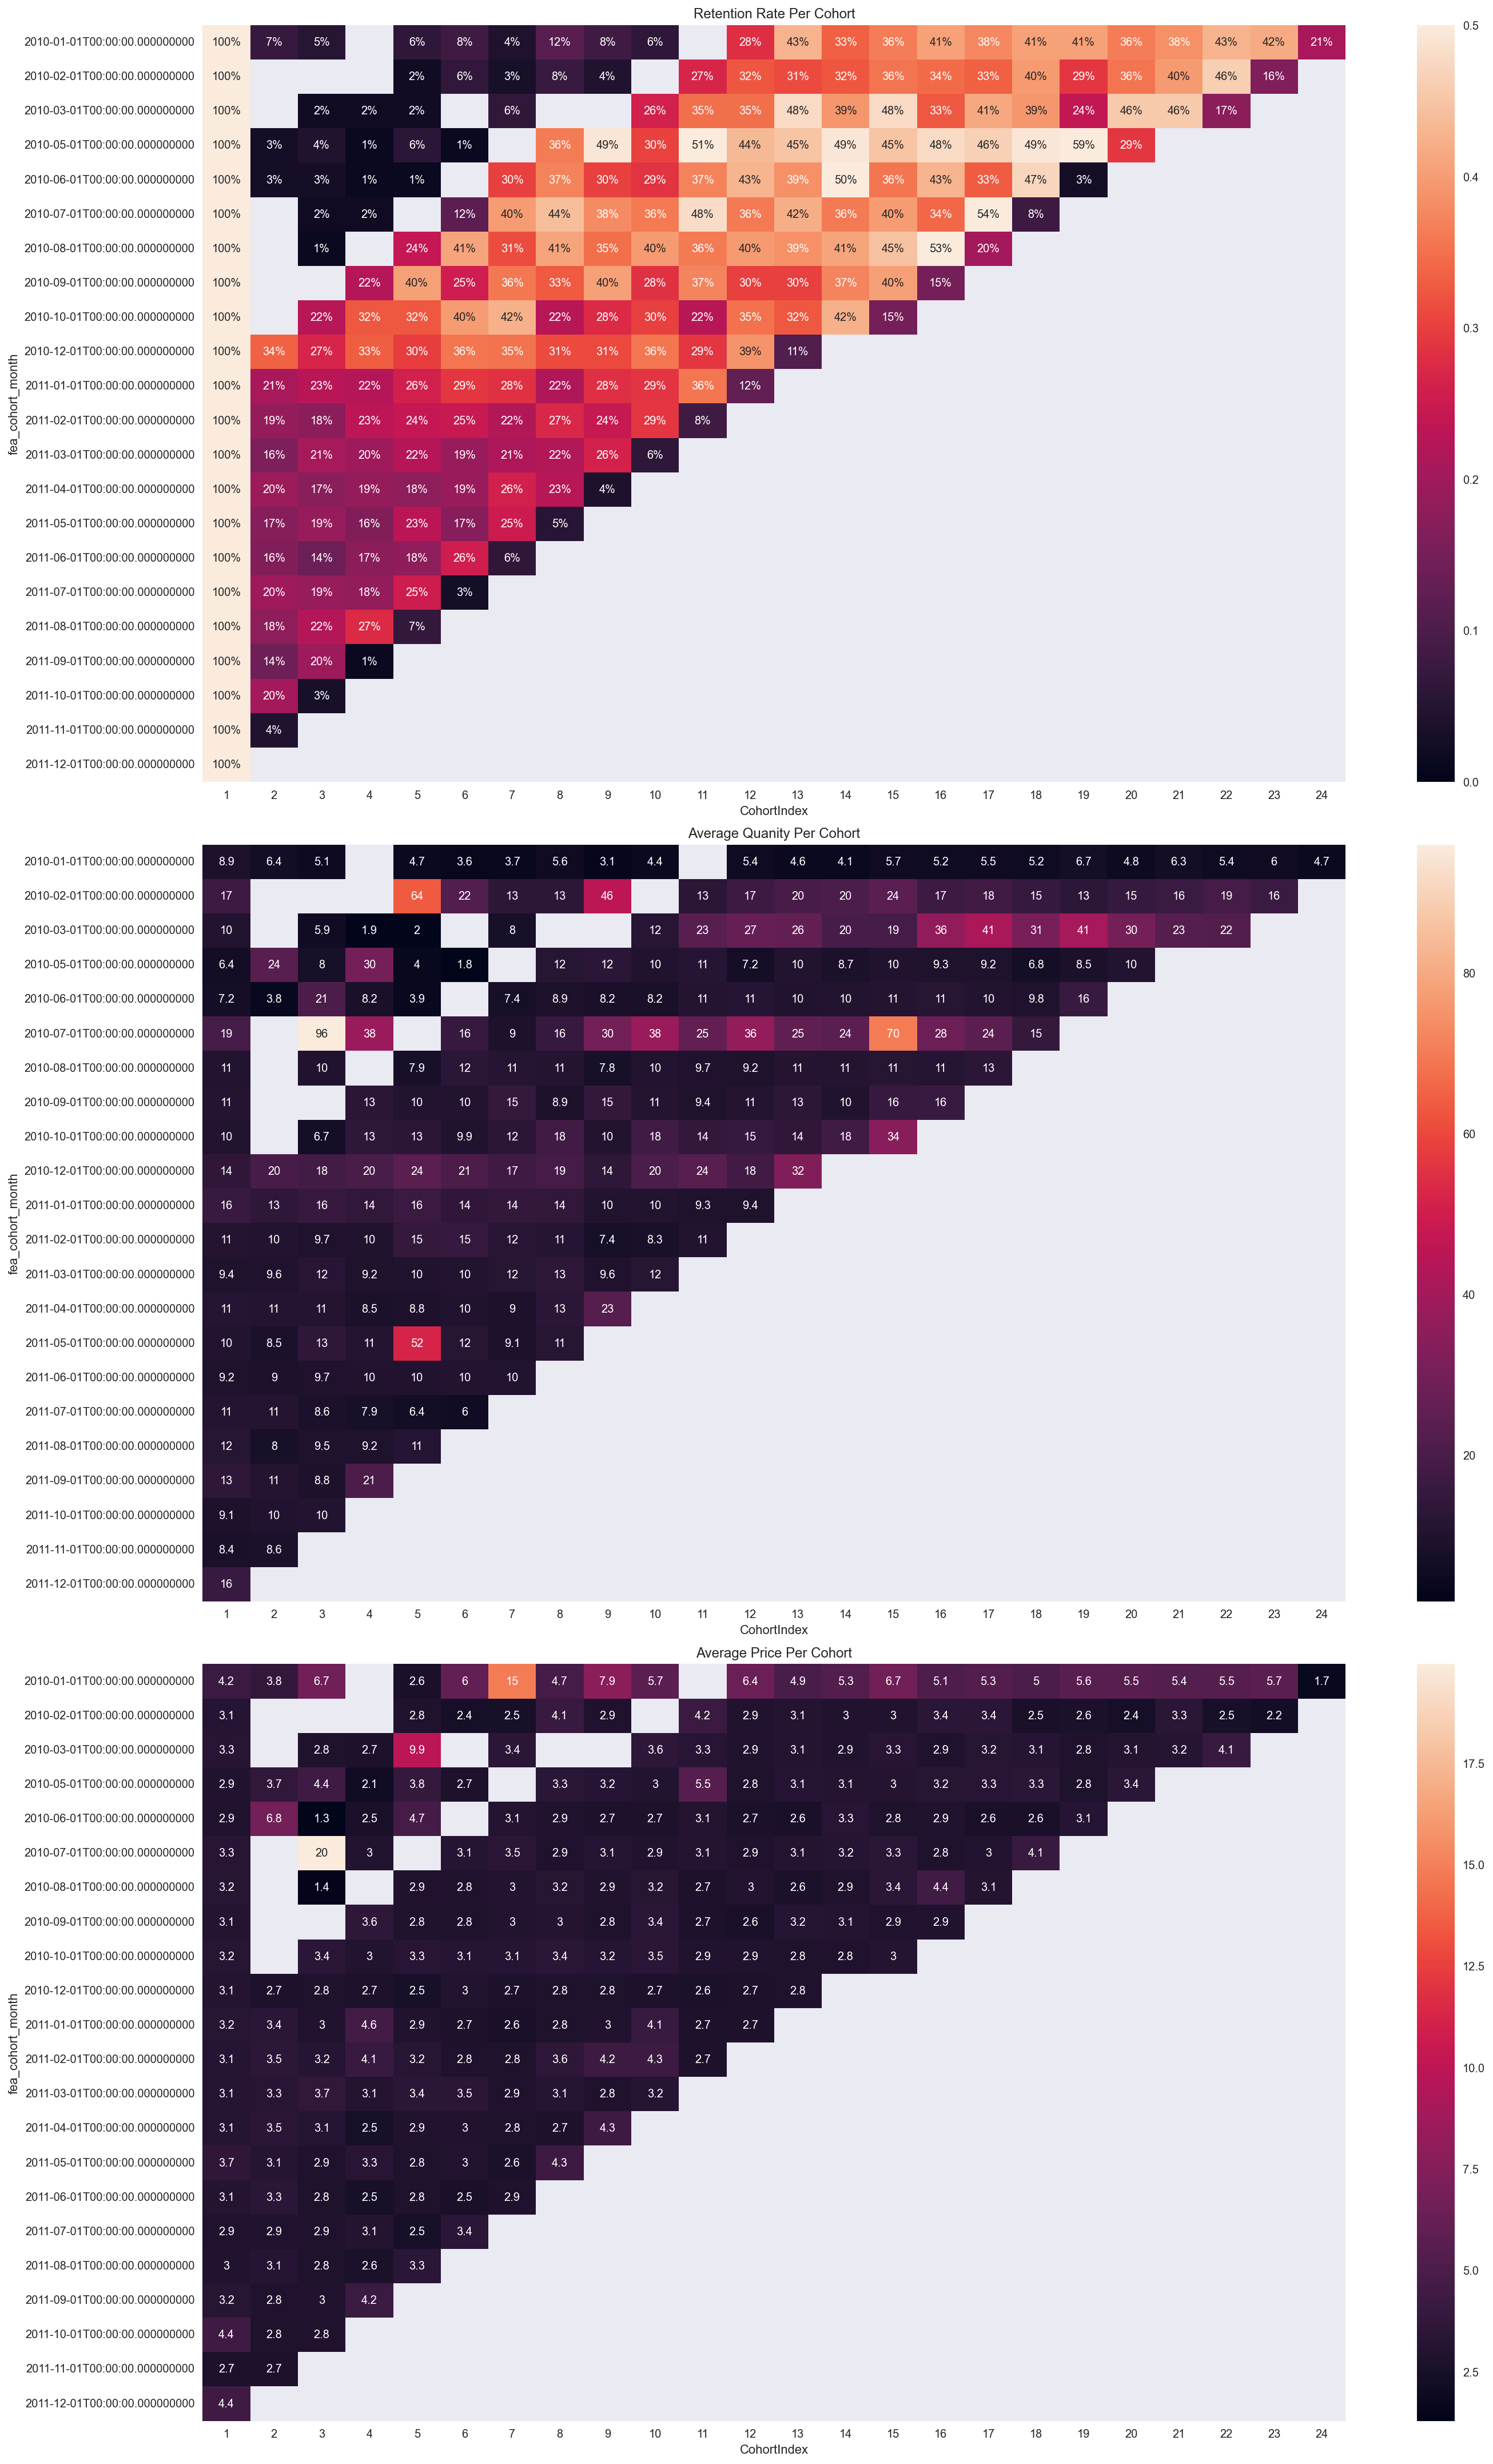

In [40]:
plt.figure(figsize=(20, 30))
plt.subplot(3, 1, 1)
plt.title('Retention Rate Per Cohort')
ax = sns.heatmap(retention, annot=True, fmt='.0%', vmin=0, vmax=0.5)

plt.subplot(3, 1, 2)
plt.title('Average Quanity Per Cohort')
ax = sns.heatmap(avg_cohort_quantity, annot=True)

plt.subplot(3, 1, 3)
plt.title('Average Price Per Cohort')
ax = sns.heatmap(avg_cohort_price, annot=True)

plt.tight_layout()

### Nhận xét
-

### 1.2. Recency, Frequency, and Monetary (RFM) Segmentation
- RFM là một phân khúc khách hàng theo hành vi để đo lường giá trị của khách hàng
- Receny: Lần mua hàng cuối cùng của mỗi khách hàng gần đây như thế nào
- Frequency: Khách hàng đã mua bao nhiêu lần trong 12 tháng qua
- Monetary Value: Khách hàng đã chi bao nhiêu trong 12 tháng qua

In [41]:
df.columns

Index(['Unnamed: 0', 'fea_invoice_date', 'fea_year', 'fea_month', 'fea_day',
       'fea_weekofyear', 'fea_daily', 'fea_customer_id', 'fea_country',
       'fea_invoice_no', 'fea_type_invoice', 'fea_stock_code',
       'fea_type_stock_code', 'fea_description_1', 'fea_description_2',
       'fea_description_3', 'fea_quantity', 'fea_unit_price', 'fea_revenue',
       'fea_date', 'fea_time', 'fea_invoice_month', 'fea_cohort_month',
       'CohortIndex'],
      dtype='object')

#### 1.2.1. Date

In [42]:
# Calculate 1-year date range from latest data
earliest_date = df['fea_invoice_date'].min()
end_date = df['fea_invoice_date'].max()

print("Actual Start Date: {}, Actual End Date: {}".format(earliest_date, end_date))

# Filter 1-year data range from original df
start_date = end_date - pd.to_timedelta(364, unit='d')
df_rfm = df[(df['fea_invoice_date'] >= start_date) & (df['fea_invoice_date'] <= end_date)]

print("RFM Start Date: {}, RFM End Date: {}".format(
    df_rfm['fea_invoice_date'].min(), df_rfm['fea_invoice_date'].max()))

Actual Start Date: 2010-01-12 08:26:00, Actual End Date: 2011-12-10 17:19:00
RFM Start Date: 2010-12-12 10:11:00, RFM End Date: 2011-12-10 17:19:00


#### 1.2.2. Recency, Frequency, MonetaryValue

In [43]:
# Create hypothetical snapshot date
snapshot_date = end_date + dt.timedelta(days=1)

# Calculate Recency, Frequency and Monetary value for each customer
df_rfm = df_rfm.groupby(['fea_customer_id']).agg({
    'fea_invoice_date': lambda x: (snapshot_date - x.max()).days,
    'fea_invoice_no': 'count',
    'fea_revenue': 'sum'})

# Rename the columns
df_rfm.rename(columns={'fea_invoice_date': 'Recency',
                       'fea_invoice_no': 'Frequency',
                       'fea_revenue': 'MonetaryValue'}, inplace=True)

# Print top 5 rows
print(df_rfm.head())

                 Recency  Frequency  MonetaryValue
fea_customer_id                                   
12346.0              327          1       77183.60
12347.0               41        151        3598.21
12348.0               77         31        1797.24
12349.0               20         73        1757.55
12350.0              312         17         334.40


#### 1.2.3. Building RFM Segments

In [44]:
# Obtain quantile of each customer
def get_quantile(df, column, start_n_quantiles, end_n_quantiles, step=1):

    category_label = range(start_n_quantiles, end_n_quantiles, step)
    
    quantiles = pd.qcut(df[column], q=abs(
        end_n_quantiles - start_n_quantiles), labels=category_label)

    df = df.assign(name=quantiles.values)

    new_column_name = column + '_Q'

    return df.rename(columns={"name": new_column_name})

In [45]:
df_rfm

,Recency,Frequency,MonetaryValue
fea_customer_id,,,
12346.0,327,1,77183.60
12347.0,41,151,3598.21
12348.0,77,31,1797.24
12349.0,20,73,1757.55
12350.0,312,17,334.40
...,...,...,...
18281.0,5,7,80.82
18282.0,217,12,178.05
18283.0,11,721,2045.53


In [46]:
df_rfm_quantile = df_rfm.copy()

df_rfm_quantile = get_quantile(df_rfm_quantile, 'Recency', 4, 0, -1)
df_rfm_quantile = get_quantile(df_rfm_quantile, 'Frequency', 1, 5)
df_rfm_quantile = get_quantile(df_rfm_quantile, 'MonetaryValue', 1, 5)

df_rfm_quantile.head()

,Recency,Frequency,MonetaryValue,Recency_Q,Frequency_Q,MonetaryValue_Q
fea_customer_id,,,,,,
12346.0,327,1,77183.60,1,1,4
12347.0,41,151,3598.21,3,4,4
12348.0,77,31,1797.24,2,2,4
12349.0,20,73,1757.55,4,3,4
12350.0,312,17,334.40,1,1,2


In [47]:
# Concatenate RFM quartile values
def join_rfm(x): 
    return str(x['Recency_Q']) + str(x['Frequency_Q']) + str(x['MonetaryValue_Q'])

In [48]:
# Form RFM segment
df_rfm_quantile['RFM_Segment'] = df_rfm_quantile.apply(join_rfm, axis=1)

df_rfm_quantile.head()

,Recency,Frequency,MonetaryValue,Recency_Q,Frequency_Q,MonetaryValue_Q,RFM_Segment
fea_customer_id,,,,,,,
12346.0,327,1,77183.60,1,1,4,114
12347.0,41,151,3598.21,3,4,4,344
12348.0,77,31,1797.24,2,2,4,224
12349.0,20,73,1757.55,4,3,4,434
12350.0,312,17,334.40,1,1,2,112


In [49]:
# Calculate RFM_Score
df_rfm_quantile['RFM_Score'] = df_rfm_quantile[['Recency_Q','Frequency_Q','MonetaryValue_Q']].sum(axis=1)

df_rfm_quantile.head()

,Recency,Frequency,MonetaryValue,Recency_Q,Frequency_Q,MonetaryValue_Q,RFM_Segment,RFM_Score
fea_customer_id,,,,,,,,
12346.0,327,1,77183.60,1,1,4,114,6.0
12347.0,41,151,3598.21,3,4,4,344,11.0
12348.0,77,31,1797.24,2,2,4,224,8.0
12349.0,20,73,1757.55,4,3,4,434,11.0
12350.0,312,17,334.40,1,1,2,112,4.0


#### 1.2.4. Analysing RFM Table

In [50]:
df_rfm_quantile.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]

RFM_Segment
444    398
111    357
344    241
122    198
211    175
433    164
222    160
233    157
333    157
311    128
dtype: int64

In [51]:
df_rfm_quantile[df_rfm_quantile['RFM_Segment']=='111'].head()

,Recency,Frequency,MonetaryValue,Recency_Q,Frequency_Q,MonetaryValue_Q,RFM_Segment,RFM_Score
fea_customer_id,,,,,,,,
12353.0,205,4,89.0,1,1,1,111,3.0
12361.0,289,10,189.9,1,1,1,111,3.0
12367.0,213,11,168.9,1,1,1,111,3.0
12386.0,193,2,143.0,1,1,1,111,3.0
12402.0,325,11,225.6,1,1,1,111,3.0


In [52]:
# Summary Metrics per RFM score
df_rfm_quantile.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count'] }).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3.0         248.9       8.0         153.1   357
4.0         179.8      14.1         228.2   371
5.0         157.9      20.8         358.9   515
6.0         104.6      26.9         628.3   475
7.0          99.4      40.2        1239.0   431
8.0          66.5      53.6        1050.8   455
9.0          55.1      76.2        1442.3   409
10.0         40.5     118.6        1965.3   429
11.0         26.5     183.1        4454.8   419
12.0         11.1     674.6       13037.7   398

In [53]:
def segment_me(df):
    if df['RFM_Score'] >= 9:
        return '1.Gold'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return '2.Silver'
    else:
        return '3.Bronze'

In [54]:
df_rfm_quantile['General_Segment'] = df_rfm_quantile.apply(segment_me, axis=1)

df_rfm_custom_segment = df_rfm_quantile.groupby('General_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)

df_rfm_custom_segment

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
1.Gold             33.5     258.2        5129.0  1655
2.Silver          108.8      34.8         797.1  1876
3.Bronze          213.7      11.1         191.4   728

### Nhận xét:
-

### 1.3. Clustering - K-Means
- K-means giả sử phân phối đồng bộ của các biến và các biến có giá trị trung bình và std bằng nhau
- Nếu phân phối không đối xứng
    - Log transformation (if all values are positive)
    - Thêm giá trị tuyệt đối của giá trị âm thấp nhất vào mỗi quan sát và sau đó với 1 hằng số nhỏ để buộc tất cả các biến là dương
    - Use a cube root transformation
    - Nếu giá trị trung bình và các biến không bằng nhau, các biến có thể được chuẩn hóa

#### 1.3.1. Data Pre-Processing for Clustering

In [69]:
df_rfm

,Recency,Frequency,MonetaryValue
fea_customer_id,,,
12346.0,327,1,77183.60
12347.0,41,151,3598.21
12348.0,77,31,1797.24
12349.0,20,73,1757.55
12350.0,312,17,334.40
...,...,...,...
18281.0,5,7,80.82
18282.0,217,12,178.05
18283.0,11,721,2045.53


In [55]:
def check_skew(df, column):
    skew = stats.skew(df[column])
    skewtest = stats.skewtest(df[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return 

C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Recency's: Skew: 1.0702552895299697, : SkewtestResult(statistic=23.66103848207167, pvalue=9.08642100245729e-124)
Frequency's: Skew: 63.96321567713435, : SkewtestResult(statistic=110.37399246409528, pvalue=0.0)


C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


MonetaryValue's: Skew: 54.958435303991976, : SkewtestResult(statistic=107.05908679757118, pvalue=0.0)


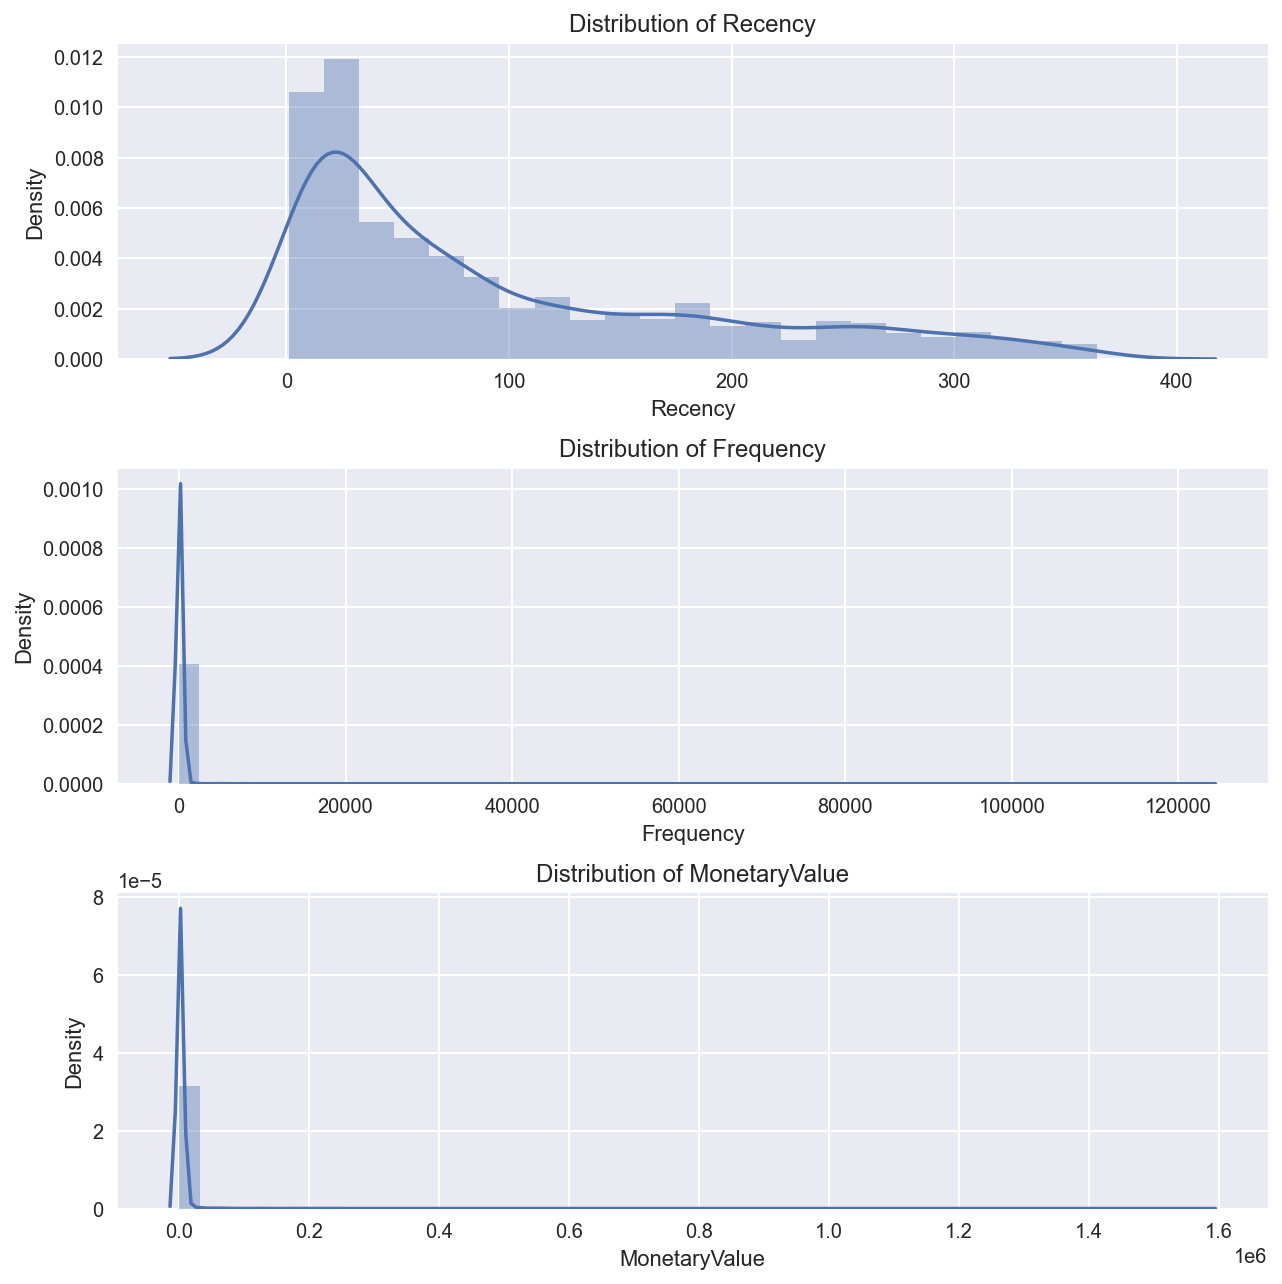

In [56]:
# Plot all 3 graphs together for summary findings
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_rfm,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm,'Frequency')

plt.subplot(3, 1, 3)
check_skew(df_rfm,'MonetaryValue')

plt.tight_layout()
plt.savefig('before_transform.png', format='png', dpi=1000)

In [57]:
df_rfm.describe()

,Recency,Frequency,MonetaryValue
count,4259.000000,4259.000000,4.259000e+03
mean,97.477577,117.521719,2.376928e+03
std,94.545697,1901.865787,2.572436e+04
min,1.000000,1.000000,3.750000e+00
25%,23.000000,17.000000,3.026400e+02
50%,61.000000,40.000000,6.636100e+02
75%,154.000000,97.000000,1.640825e+03
max,364.000000,123375.000000,1.580270e+06


In [58]:
# Copy original to new df
df_rfm_log = df_rfm.copy()

# Data Pre-Processing for Negative Value
df_rfm_log['MonetaryValue'] = (df_rfm_log['MonetaryValue'] - df_rfm_log['MonetaryValue'].min()) + 1

df_rfm_log.describe()

,Recency,Frequency,MonetaryValue
count,4259.000000,4259.000000,4.259000e+03
mean,97.477577,117.521719,2.374178e+03
std,94.545697,1901.865787,2.572436e+04
min,1.000000,1.000000,1.000000e+00
25%,23.000000,17.000000,2.998900e+02
50%,61.000000,40.000000,6.608600e+02
75%,154.000000,97.000000,1.638075e+03
max,364.000000,123375.000000,1.580268e+06


C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

Recency's: Skew: -0.724271061255189, : SkewtestResult(statistic=-17.42397890933477, pvalue=5.4268558354992135e-68)
Frequency's: Skew: -0.16951836285144772, : SkewtestResult(statistic=-4.4926221895680305, pvalue=7.035152896962768e-06)
MonetaryValue's: Skew: 0.3716014685035266, : SkewtestResult(statistic=9.605422327831494, pvalue=7.58463521553921e-22)


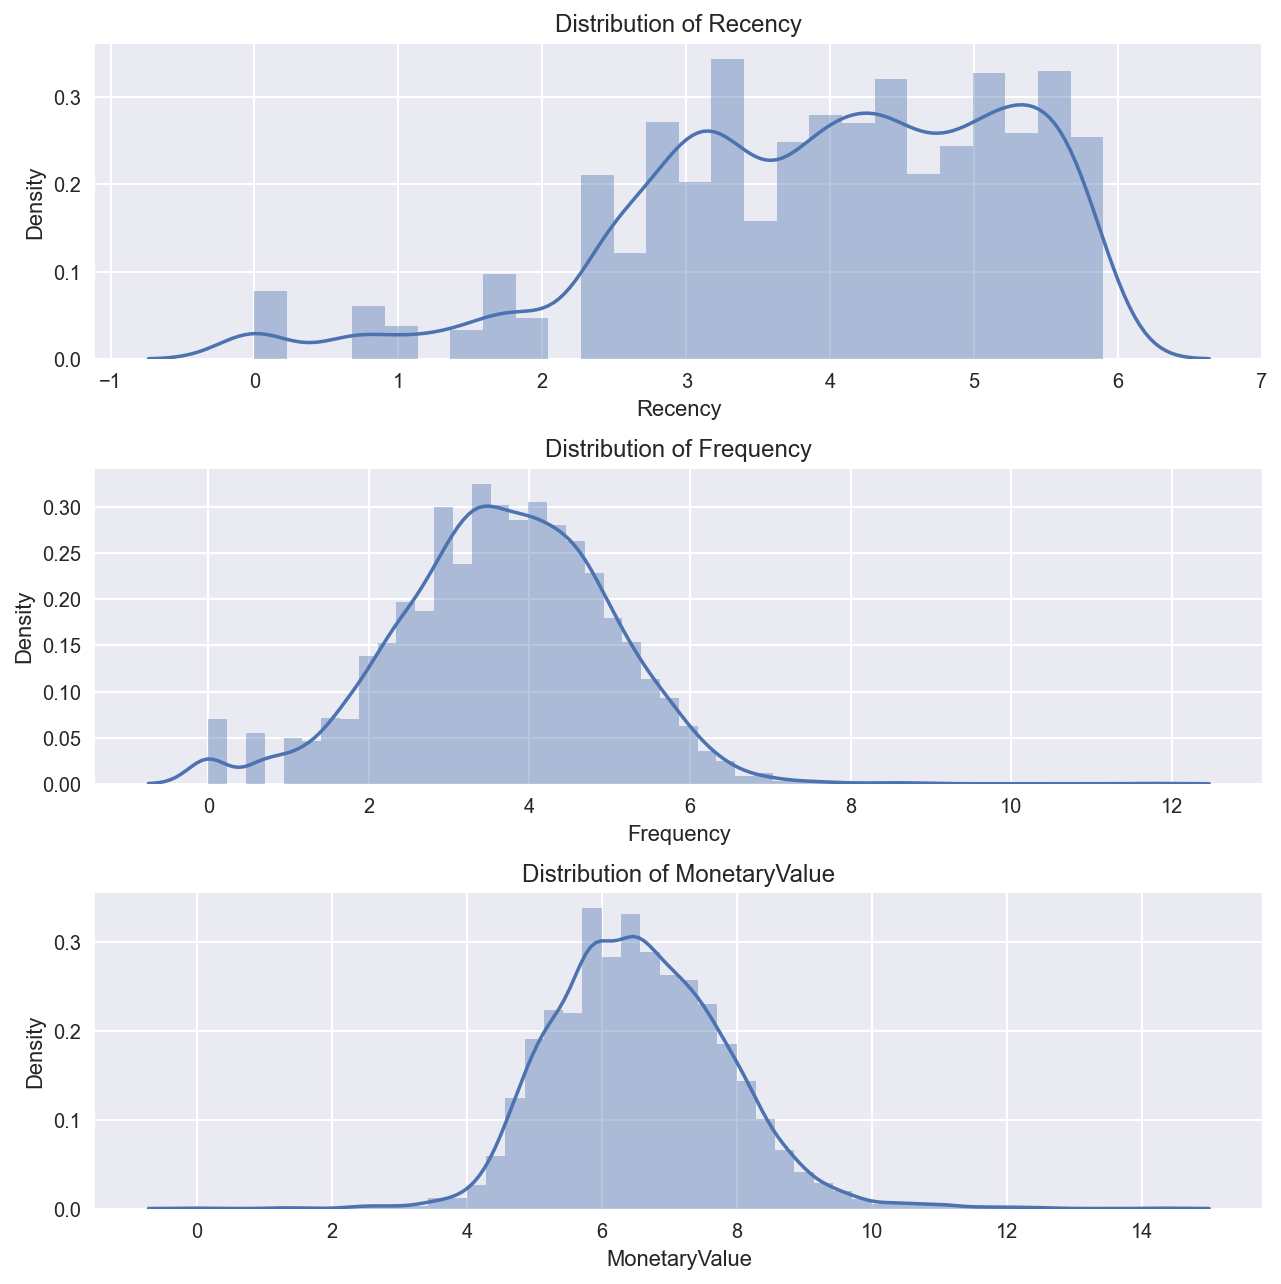

In [59]:
# Transform skewed data with log tranasformation
df_rfm_log = np.log(df_rfm_log)

# Check for skewness after log transformation
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm_log,'Frequency')

plt.subplot(3, 1, 3)
check_skew(df_rfm_log,'MonetaryValue')

plt.tight_layout()
plt.savefig('after_transform.png', format='png', dpi=1000)

In [60]:
# Scaling data
scaler = StandardScaler()
scaler.fit(df_rfm_log)
df_rfm_normal = scaler.transform(df_rfm_log)

df_rfm_normal = pd.DataFrame(df_rfm_normal, index=df_rfm_log.index, columns=df_rfm_log.columns)

# Check result after standardising
df_rfm_normal.describe().round(3)

,Recency,Frequency,MonetaryValue
count,4259.000,4259.000,4259.000
mean,0.000,-0.000,0.000
std,1.000,1.000,1.000
min,-3.028,-2.778,-5.159
25%,-0.626,-0.628,-0.678
50%,0.121,0.021,-0.057
75%,0.830,0.694,0.656
max,1.489,6.118,6.054


### Nhận xét
- Thực hiện đúng về dữ liệu bài toán dùng thuật k-means

#### 1.3.2. K-means clustering
- Building Customer Personas
- Có 2 phướng án để chia cụm:
    - Elbow criterion (visual method)
    - Silhouette Score (math method)

##### 1.3.2.1 Đo lường K-means

In [61]:
def optimal_kmeans(dataset, start=2, end=11):
    '''
    Calculate the optimal number of kmeans
    
    INPUT:
        dataset : dataframe. Dataset for k-means to fit
        start : int. Starting range of kmeans to test
        end : int. Ending range of kmeans to test
    OUTPUT:
        Values of Inertia and Silhouette Score.
        Lineplot of values of Inertia and Silhouette Score.
    '''
    
    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []
    inertia = []

    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels, random_state=1), 3)
        inertia_score = round(kmeans.inertia_, 2)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)
        inertia.append(inertia_score)

        print("No. Clusters: {}, Silhouette Score(SS): {}, SS Delta: {}, Inertia: {}, Inertia Delta: {}".format(
            n_clusters, 
            silhouette_avg, 
            round((km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]),3), 
            inertia_score, 
            round((inertia[n_clusters - start] - inertia[n_clusters - start - 1]))),3)

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(9,6))

            plt.subplot(2, 1, 1)
            plt.title('Within-Cluster Sum-of-Squares / Inertia')
            sns.pointplot(x=n_clu, y=inertia)

            plt.subplot(2, 1, 2)
            plt.title('Silhouette Score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.tight_layout()
            plt.show()

No. Clusters: 2, Silhouette Score(SS): 0.394, SS Delta: 0.0, Inertia: 6886.41, Inertia Delta: 0 3
No. Clusters: 3, Silhouette Score(SS): 0.291, SS Delta: -0.103, Inertia: 5446.26, Inertia Delta: -1440 3
No. Clusters: 4, Silhouette Score(SS): 0.296, SS Delta: 0.005, Inertia: 4504.02, Inertia Delta: -942 3
No. Clusters: 5, Silhouette Score(SS): 0.275, SS Delta: -0.021, Inertia: 3857.41, Inertia Delta: -647 3
No. Clusters: 6, Silhouette Score(SS): 0.284, SS Delta: 0.009, Inertia: 3448.96, Inertia Delta: -408 3
No. Clusters: 7, Silhouette Score(SS): 0.274, SS Delta: -0.01, Inertia: 3101.56, Inertia Delta: -347 3
No. Clusters: 8, Silhouette Score(SS): 0.268, SS Delta: -0.006, Inertia: 2827.22, Inertia Delta: -274 3
No. Clusters: 9, Silhouette Score(SS): 0.259, SS Delta: -0.009, Inertia: 2647.61, Inertia Delta: -180 3
No. Clusters: 10, Silhouette Score(SS): 0.268, SS Delta: 0.009, Inertia: 2485.29, Inertia Delta: -162 3


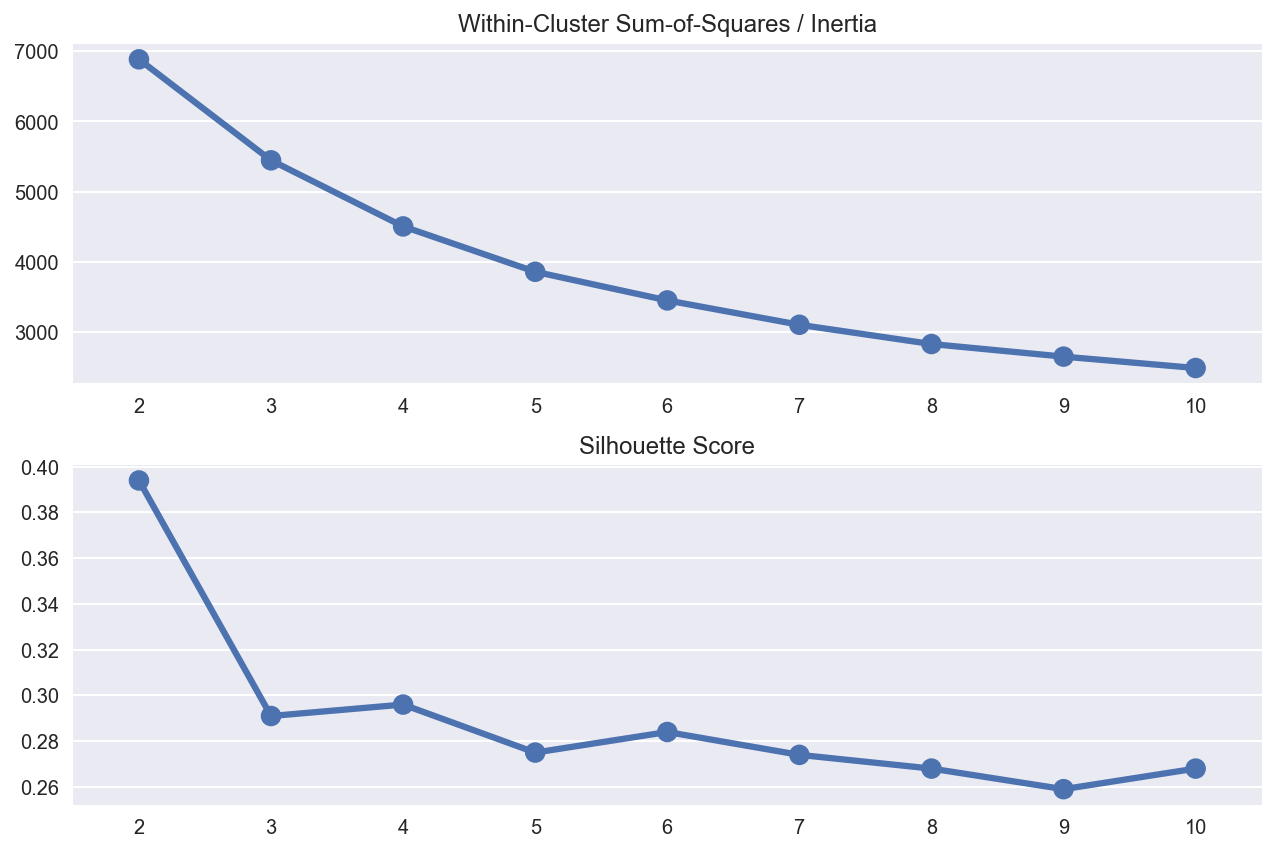

In [62]:
optimal_kmeans(df_rfm_normal)

##### 1.3.2.2. Implementing KMeans 

In [63]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    '''
    Implement k-means clustering on dataset
    
    INPUT:
        normalised_df_rfm : dataframe. Normalised rfm dataset for k-means to fit.
        clusters_number : int. Number of clusters to form.
        original_df_rfm : dataframe. Original rfm dataset to assign the labels to.
    OUTPUT:
        Cluster results and t-SNE visualisation of clusters.
    '''
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

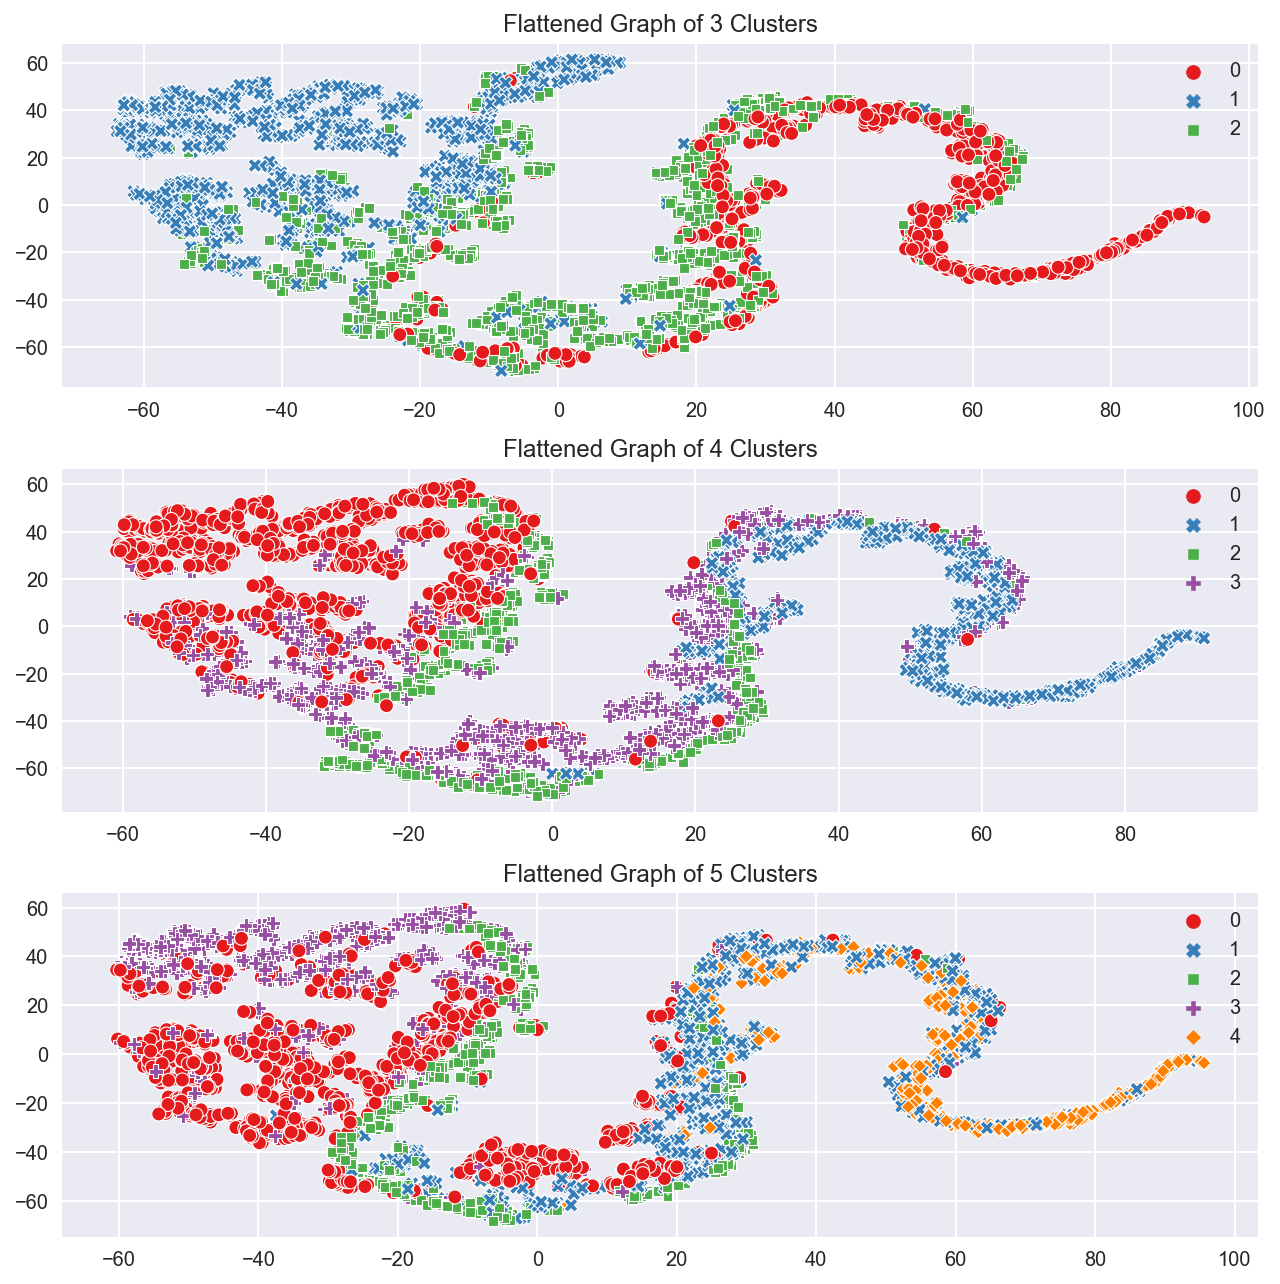

In [64]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(df_rfm_normal, 3, df_rfm)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(df_rfm_normal, 4, df_rfm)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(df_rfm_normal, 5, df_rfm)

plt.tight_layout()
plt.savefig('flattened.png', format='png', dpi=1000)

### 1.3.3. Xây dựng 1 khách hàng
- Summary Statistics
    - Snake Plots

In [65]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):
    '''
    Transform dataframe and plot snakeplot
    '''
    # Transform df_normal as df and add cluster column
    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=df_rfm.index, 
                                       columns=df_rfm.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['fea_customer_id', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'MonetaryValue'], 
                        var_name='Metric', 
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

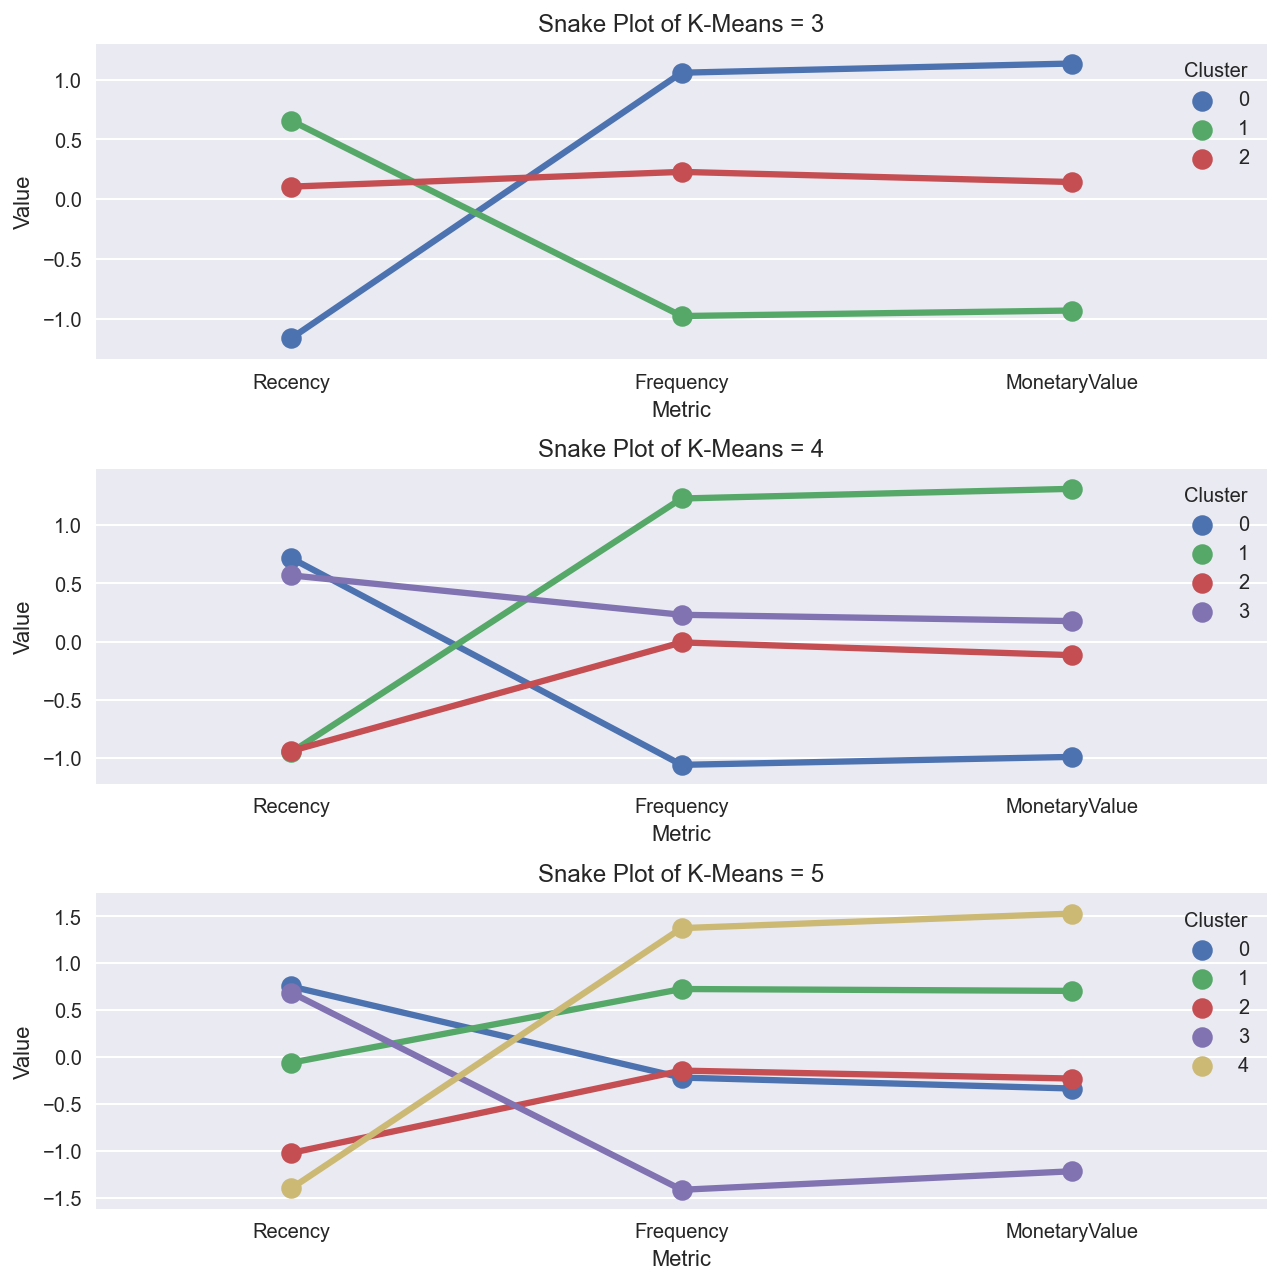

In [66]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of K-Means = 3')
snake_plot(df_rfm_normal, df_rfm_k3, df_rfm)

plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 4')
snake_plot(df_rfm_normal, df_rfm_k4, df_rfm)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of K-Means = 5')
snake_plot(df_rfm_normal, df_rfm_k5, df_rfm)

plt.tight_layout()

In [67]:
def relative_importance(df_rfm_kmeans, df_rfm_original):
    '''
    Calculate relative importance of segment attributes and plot heatmap
    '''
    # Calculate average RFM values for each cluster
    cluster_avg = df_rfm_kmeans.groupby(['Cluster']).mean() 

    # Calculate average RFM values for the total customer population
    population_avg = df_rfm.mean()

    # Calculate relative importance of cluster's attribute value compared to population
    relative_imp = cluster_avg / population_avg - 1

    sns.heatmap(data=relative_imp, annot=True, fmt='.2f')
    
    return

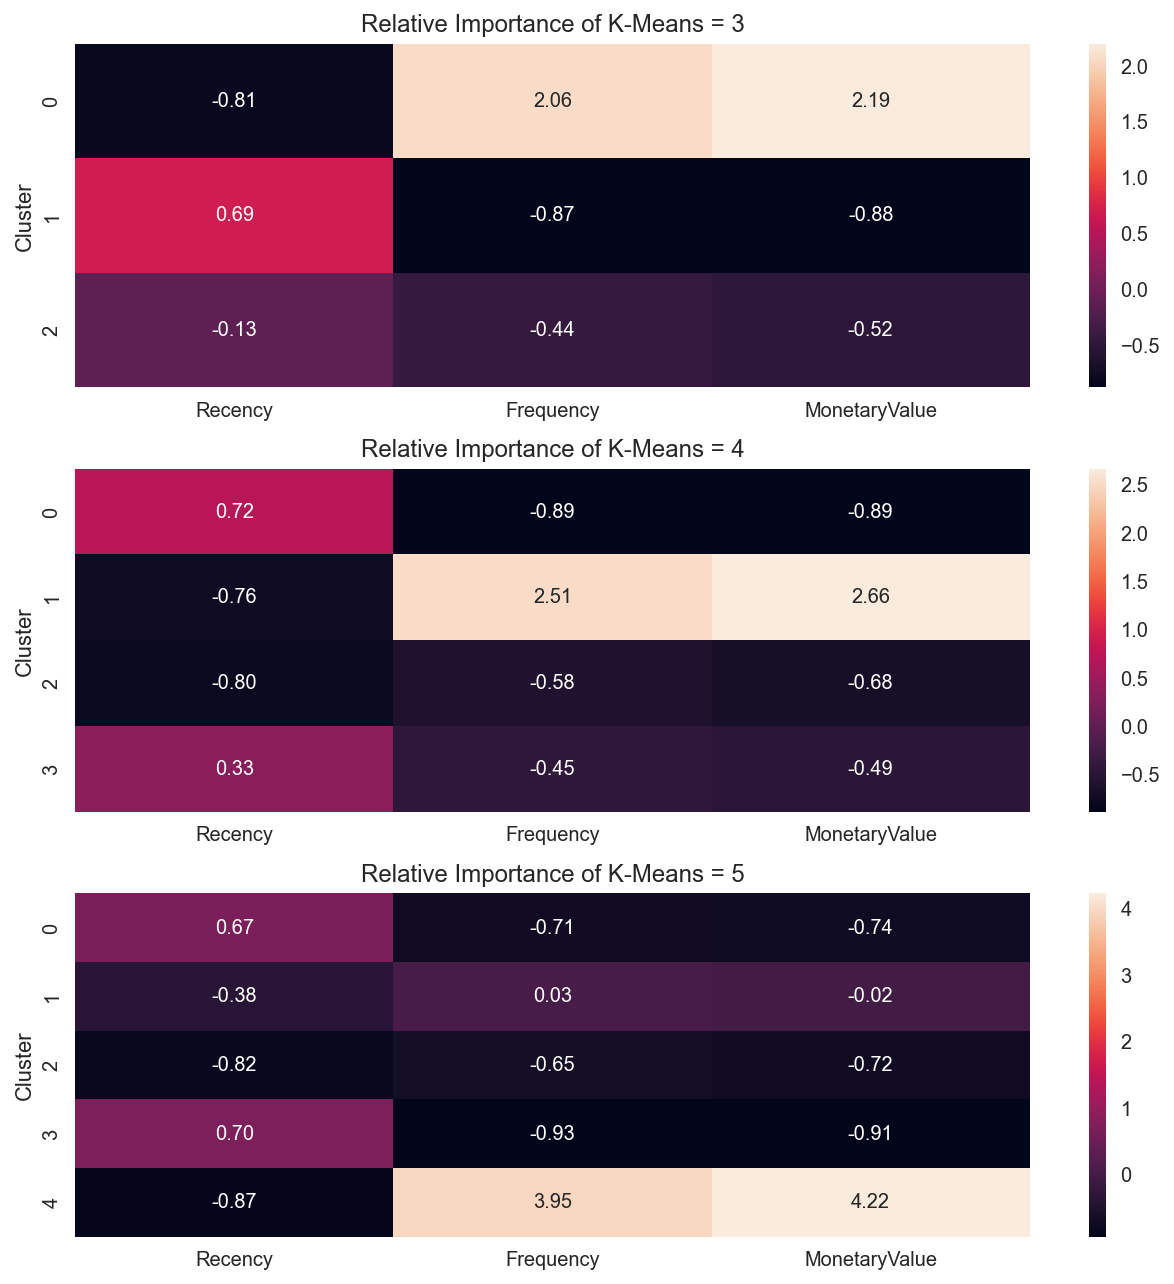

In [68]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
plt.title('Relative Importance of K-Means = 3')
relative_importance(df_rfm_k3, df_rfm)

plt.subplot(3, 1, 2)
plt.title('Relative Importance of K-Means = 4')
relative_importance(df_rfm_k4, df_rfm)

plt.subplot(3, 1, 3)
plt.title('Relative Importance of K-Means = 5')
relative_importance(df_rfm_k5, df_rfm)

plt.tight_layout()

### Nhận xét
- Có thể chia thành 3-4 nhóm như sau:
1. Nếu là chia 3 nhóm thì sẽ như sau:
    - Nhóm khách hàng vàng: tần xuất đăng nhập thấp, nhưng giao dịch và số tiền bỏ ra cao
    - Nhóm khách hàng bạc: tần xuất đăng nhập vừa, nhưng giao dịch và số tiền bỏ cũng tưng ứng với số tiền bỏ ra của khách hàng
    - Nhóm thứ đồng: Thể hiện tần xuất đăng nhập cao, nhưng giao dịch và số tiền bỏ ra không đáng kể
2. Nếu là chia ra 4 nhóm thì như sau:
    - 2 Nhóm vàng và đồng không thay đổi
    - Nhưng ở nhóm bạc thì ta thấy có 2 cái phân biệt rõ ràng
        - Một nhóm tần xuất đăng nhập ít nhưng giao dịch và doanh số cao => Có thể kéo lên nhóm vàng
        - Một nhóm tần xuất đăng nhập nhiều tương ứng với phân giao dịch và lượng tiền tương tự
3. Từ đó bộ phân mkt dữa trên để làm như sau
    - Đưa ra các chường trình phù hợp cho các thành viên vàng đạt với chỉ tiêu khách hàng bạch kim và duy trì khách hàng hàng và giữ chân khách hàng
    - Đối với thành viên bạc thì sẽ tách thành 2 phân khúc khách hàng để thực hiện cho phù hợp với bài toán hơn
    - Đối với thành viên là đồng thì nên hạn chế và xem xét khách hàng nào tiêm năng để đảnh lên thành viên bạc